<a href="https://colab.research.google.com/github/waveology/kitchen/blob/main/introduccion_cdo_climate_data_operators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Data Operators (*cdo*)


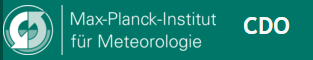

* [Web del proyecto](https://code.mpimet.mpg.de/projects/cdo/wiki/Cdo#Documentation)
* [Guía de usuario](https://code.mpimet.mpg.de/projects/cdo/embedded/cdo.pdf)

Organización de los operadores por tipo de acción:
>* Información
* Operaciones con ficheros
* Selección
* Comparación
* Modificación
* Aritmética
* Estadística
* Correlación
* Regresión
* Componentes principales
* Interpolación
* Transformación
* Entradas y salidas
* Miscelánea







## Instalación de Climate Data Operators


###A partir de condacolab

In [3]:
# Instala conda en Colab
# Puede ser necesario ejecutar esta celda dos
# veces para completar el reinicio del entorno
# ---------------------------------------------
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [4]:
# Instala CDO
# -------------
condacolab.check()
!mamba install -q cdo

✨🍰✨ Everything looks OK!


### A partir de conda

In [5]:
## Consultamos la versión de Python
## ---------------------------------
#!python --version

In [6]:
# ifile = 'Miniconda3-latest-Linux-x86_64.sh'
# !wget https://repo.anaconda.com/miniconda/{ifile}
# ! chmod +x {ifile}
# ! bash ./{ifile} -b -f -p /usr/local/
# !conda install --channel defaults conda python=3.10 --yes
# !conda update --channel defaults --all --yes
# !conda config --add channels conda-forge
## Especificar la versión de Python del entorno
## ---------------------------------------------
# os.environ['PATH'] += ":/usr/local/lib/python3.10/site-packages"
# !conda install cdo -y

##Descarga de datos

In [ ]:
ifile = 'era5_t2m_w10_2020_europa_025.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/7tJ8c3UpRK9sqVE/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}
!mv era5_t2m_w10_2020_europa_025.nc era5_2000.nc

ifile = 'era5_t2m_1987_2020_europa_025_lsm.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/leirUBqlMnLxIAL/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}
!mv era5_t2m_1987_2020_europa_025_lsm.nc mascara_tierra_mar.nc

## Operadores de [información](https://code.mpimet.mpg.de/projects/cdo/embedded/index.html#x1-560002.1)

In [8]:
# Información y estadística básica
# ---------------------------------
!cdo info era5_2000.nc | head -n 10

    -1 :       Date     Time   Level Gridsize    Miss :     Minimum        Mean     Maximum : Parameter ID
     1 : 2020-01-01 12:00:00       0    25921       0 :     -11.517    -0.51731      14.942 : -1            
     2 : 2020-01-01 12:00:00       0    25921       0 :     -13.074      4.1927      23.707 : -2            
     3 : 2020-01-01 12:00:00       0    25921       0 :      262.38      285.93      295.21 : -3            
     4 : 2020-01-02 12:00:00       0    25921       0 :     -11.230      1.2525      19.340 : -1            
     5 : 2020-01-02 12:00:00       0    25921       0 :     -17.157      1.2410      16.085 : -2            
     6 : 2020-01-02 12:00:00       0    25921       0 :      260.46      285.69      296.55 : -3            
     7 : 2020-01-03 12:00:00       0    25921       0 :     -11.227    0.020584      18.799 : -1            
     8 : 2020-01-03 12:00:00       0    25921       0 :     -11.802      1.2643      15.555 : -2            
     9 : 2020-01-03 1

In [9]:
# Información reducida
# ---------------------------------
!cdo sinfo era5_2000.nc | head -n 20

   File format : NetCDF2
    -1 : Institut Source   T Steptype Levels Num    Points Num Dtype : Parameter ID
     1 : unknown  unknown  v instant       1   1     25921   1  I16  : -1            
     2 : unknown  unknown  v instant       1   1     25921   1  I16  : -2            
     3 : unknown  unknown  v instant       1   1     25921   1  I16  : -3            
   Grid coordinates :
     1 : lonlat                   : points=25921 (161x161)
                        longitude : -30 to 10 by 0.25 degrees_east
                         latitude : 60 to 20 by -0.25 degrees_north
   Vertical coordinates :
     1 : surface                  : levels=1
   Time coordinate :
                             time : 366 steps
     RefTime =  1900-01-01 00:00:00  Units = hours  Calendar = gregorian
  YYYY-MM-DD hh:mm:ss  YYYY-MM-DD hh:mm:ss  YYYY-MM-DD hh:mm:ss  YYYY-MM-DD hh:mm:ss
  2020-01-01 12:00:00  2020-01-02 12:00:00  2020-01-03 12:00:00  2020-01-04 12:00:00
  2020-01-05 12:00:00  2020-01-06 12

In [10]:
# Número de parámetros
# ---------------------------------
!cdo npar era5_2000.nc

3
cdo    npar: Processed 3 variables [0.01s 94MB]


In [11]:
# Número de niveles
# ---------------------------------
!cdo nlevel era5_2000.nc

1
1
1
cdo    nlevel: Processed 3 variables [0.01s 94MB]


In [12]:
# Número de fechas
# ---------------------------------
!cdo ndate era5_2000.nc

366
cdo    ndate: Processed 3 variables over 366 timesteps [0.01s 94MB]


In [13]:
# Número de puntos de rejilla de cada variable
# --------------------------------------------
!cdo ngridpoints era5_2000.nc

25921
25921
25921
cdo    ngridpoints: Processed 3 variables [0.01s 94MB]


In [14]:
# Formato del fichero
# --------------------
!cdo showformat era5_2000.nc

NetCDF2
cdo    showformat: Processed 3 variables [0.01s 94MB]


In [15]:
# Nombre de las variables
# -----------------------
!cdo showname era5_2000.nc

 u10 v10 t2m
cdo    showname: Processed 3 variables [0.01s 94MB]


In [16]:
# Atributos NetCDF de las variables
# ----------------.........----------
!cdo showatts era5_2000.nc

u10:
   long_name = "10 metre U wind component"
   units = "m s**-1"
   missing_value = -32767
   add_offset = 3.3796
   scale_factor = 0.000744071
v10:
   long_name = "10 metre V wind component"
   units = "m s**-1"
   missing_value = -32767
   add_offset = 0.859812
   scale_factor = 0.000729501
t2m:
   long_name = "2 metre temperature"
   units = "K"
   missing_value = -32767
   add_offset = 289.974
   scale_factor = 0.000981111
Global:
   Conventions = "CF-1.6"
   history = "2023-06-19 09:03:51 GMT by grib_to_netcdf-2.30.2: grib_to_netcdf era5_t2m_w10_2020_europa_025 -o era5_t2m_w10_2020_europa_025.nc"
cdo    showatts: Processed 3 variables [0.01s 95MB]


## [Operadores de ficheros](https://code.mpimet.mpg.de/projects/cdo/embedded/index.html#x1-920002.2)

Entre los más utilizados se encuentran los operadores de separación. Estos permiten distribuir la información contenida en un fichero entre varios en base a un criterio.

In [17]:
# Separa un fichero de datos anuales en 12 ficheros
# con datos mensuales
# ---------------------------------------------------
!cdo splitmon era5_2000.nc mes_

cdo    splitmon: Processed 28461258 values from 3 variables over 366 timesteps [0.73s 95MB]


In [18]:
# Muestra las fechas contenidas en el fichero correspondiente
# al mes de febrero
# ------------------------------------------------------------
!cdo showdate mes_02.nc

  2020-02-01  2020-02-02  2020-02-03  2020-02-04  2020-02-05  2020-02-06  2020-02-07  2020-02-08  2020-02-09  2020-02-10  2020-02-11  2020-02-12
  2020-02-13  2020-02-14  2020-02-15  2020-02-16  2020-02-17  2020-02-18  2020-02-19  2020-02-20  2020-02-21  2020-02-22  2020-02-23  2020-02-24
  2020-02-25  2020-02-26  2020-02-27  2020-02-28  2020-02-29
cdo    showdate: Processed 6 variables over 29 timesteps [0.01s 95MB]


In [19]:
# Separa el fichero de datos de febrero en uno por cada variable
# ---------------------------------------------------------------
!cdo splitvar mes_02.nc febrero_

cdo    splitname: Processed 2255127 values from 3 variables over 29 timesteps [0.06s 95MB]


La operación inversa de aglutinar información de múltiples ficheros en uno se lleva a cabo con los operadores de prefijo *merge*

In [20]:
# Separa el fichero de datos de febrero en uno por cada variable
# ---------------------------------------------------------------
!cdo mergetime mes_12.nc mes_01.nc mes_02.nc DJF.nc

cdo    mergetime: Processed 7076433 values from 9 variables over 91 timesteps [0.23s 95MB]


In [21]:
# Muestra las fechas contenidas en el fichero correspondiente
# al mes de febrero
# ------------------------------------------------------------
!cdo showdate DJF.nc

  2020-01-01  2020-01-02  2020-01-03  2020-01-04  2020-01-05  2020-01-06  2020-01-07  2020-01-08  2020-01-09  2020-01-10  2020-01-11  2020-01-12
  2020-01-13  2020-01-14  2020-01-15  2020-01-16  2020-01-17  2020-01-18  2020-01-19  2020-01-20  2020-01-21  2020-01-22  2020-01-23  2020-01-24
  2020-01-25  2020-01-26  2020-01-27  2020-01-28  2020-01-29  2020-01-30  2020-01-31  2020-02-01  2020-02-02  2020-02-03  2020-02-04  2020-02-05
  2020-02-06  2020-02-07  2020-02-08  2020-02-09  2020-02-10  2020-02-11  2020-02-12  2020-02-13  2020-02-14  2020-02-15  2020-02-16  2020-02-17
  2020-02-18  2020-02-19  2020-02-20  2020-02-21  2020-02-22  2020-02-23  2020-02-24  2020-02-25  2020-02-26  2020-02-27  2020-02-28  2020-02-29
  2020-12-01  2020-12-02  2020-12-03  2020-12-04  2020-12-05  2020-12-06  2020-12-07  2020-12-08  2020-12-09  2020-12-10  2020-12-11  2020-12-12
  2020-12-13  2020-12-14  2020-12-15  2020-12-16  2020-12-17  2020-12-18  2020-12-19  2020-12-20  2020-12-21  2020-12-22  2020-12-

En muchos casos los operadores pueden encadenarse anteponiendo un guión a su nombre. Esto optimiza los procesos porque evitan la creación de ficheros intermedios y la escritura a disco es a menudo un cuello de botella en el cálculo intensivo.

In [22]:
# Encadenado de operadores
# 1) se fusionan los datos correspondientes a los meses de verano
# 2) la fusión resultante se separa en un fichero por cada variable
# ----------------------------------------------------------------------
!cdo  -splitvar -mergetime mes_06.nc mes_07.nc mes_08.nc JJA_

cdo(1) mergetime: Process started
cdo(1) mergetime: Processed 7154196 values from 9 variables over 92 timesteps
cdo    splitname: Processed 7154196 values from 3 variables over 92 timesteps [0.21s 95MB]


In [23]:
# Limpieza
# ----------------------------------
!rm -f mes_*.nc febrero_*.nc JJA_*.nc

##Operadores de [selección](https://code.mpimet.mpg.de/projects/cdo/embedded/index.html#x1-1670002.3)

In [24]:
# Selecciona los datos correspondientes a la temepetatura del invierno climatológico
# ----------------------------------------------------------------------------------
!cdo select,name=t2m,season=DJF era5_2000.nc DJF_t2m.nc

cdo    select: Processed 2358811 values from 3 variables over 366 timesteps [0.05s 95MB]


In [25]:
# Elimina los días 29 de febrero que encuentre en
# el fichero de entrada (dom = day of month)
# -------------------------------------------------------
!cdo delete,dom=29feb DJF_t2m.nc DJF_t2m_sin_29feb.nc

cdo    delete: Processed 2332890 values from 1 variable over 91 timesteps [0.05s 95MB]


In [26]:
# Comprobación
# ------------------------------------------------------------
!cdo showdate DJF_t2m.nc
!cdo showdate DJF_t2m_sin_29feb.nc

  2020-01-01  2020-01-02  2020-01-03  2020-01-04  2020-01-05  2020-01-06  2020-01-07  2020-01-08  2020-01-09  2020-01-10  2020-01-11  2020-01-12
  2020-01-13  2020-01-14  2020-01-15  2020-01-16  2020-01-17  2020-01-18  2020-01-19  2020-01-20  2020-01-21  2020-01-22  2020-01-23  2020-01-24
  2020-01-25  2020-01-26  2020-01-27  2020-01-28  2020-01-29  2020-01-30  2020-01-31  2020-02-01  2020-02-02  2020-02-03  2020-02-04  2020-02-05
  2020-02-06  2020-02-07  2020-02-08  2020-02-09  2020-02-10  2020-02-11  2020-02-12  2020-02-13  2020-02-14  2020-02-15  2020-02-16  2020-02-17
  2020-02-18  2020-02-19  2020-02-20  2020-02-21  2020-02-22  2020-02-23  2020-02-24  2020-02-25  2020-02-26  2020-02-27  2020-02-28  2020-02-29
  2020-12-01  2020-12-02  2020-12-03  2020-12-04  2020-12-05  2020-12-06  2020-12-07  2020-12-08  2020-12-09  2020-12-10  2020-12-11  2020-12-12
  2020-12-13  2020-12-14  2020-12-15  2020-12-16  2020-12-17  2020-12-18  2020-12-19  2020-12-20  2020-12-21  2020-12-22  2020-12-

Las mismas operaciones pero encadenando los operadores.

* Nótese que en general, el orden de encadenamiento puede afectar a la eficiencia.
* Cuando existe ambigüedad en el ámbito de actuación de los operadores se usan paréntesis para clarificarla.

In [27]:
# Selecciona los datos correspondientes al invierno climatológico y eliminamos el 29 de febrero del resultado
# -O fuerza la sobreescritura de un fichero preexistente
# El resultado de 'select' solo existe en memoria
# ---------------------------------------------------------------------------------------------------------
!cdo -O  -delete,dom=29feb [ -select,name=t2m,season=DJF   era5_2000.nc ]  DJF_t2m_sin_29feb.nc

cdo(1) select: Process started
cdo(1) select: Processed 2358811 values from 3 variables over 366 timesteps
cdo    delete: Processed 2332890 values from 1 variable over 91 timesteps [0.07s 95MB]


In [28]:
# Selecciona un rango arbitrario de fechas
# -------------------------------------------
!cdo seldate,'2020-07-24T00:00:00','2020-08-15T23:59:59' era5_2000.nc europa.nc

## Se obtiene el mismo resultado usando el operador genérico 'select'
## -------------------------------------------------------------------
# !cdo -O select,startdate='2020-07-24T00:00:00',enddate='2020-08-15T23:59:59' era5_2000.nc europa.nc

cdo    seldate: Processed 1788549 values from 3 variables over 229 timesteps [0.05s 95MB]


In [29]:
!cdo sinfo europa.nc | head -n 10

   File format : NetCDF2
    -1 : Institut Source   T Steptype Levels Num    Points Num Dtype : Parameter ID
     1 : unknown  unknown  v instant       1   1     25921   1  I16  : -1            
     2 : unknown  unknown  v instant       1   1     25921   1  I16  : -2            
     3 : unknown  unknown  v instant       1   1     25921   1  I16  : -3            
   Grid coordinates :
     1 : lonlat                   : points=25921 (161x161)
                        longitude : -30 to 10 by 0.25 degrees_east
                         latitude : 60 to 20 by -0.25 degrees_north
   Vertical coordinates :


In [30]:
# Selecciona una ventana geográfica en torno a la península ibérica
# ------------------------------------------------------------------
!cdo sellonlatbox,-12,5,35,45 europa.nc  peninsula.nc

cdo    sellonlatbox: Processed 1788549 values from 3 variables over 23 timesteps [0.02s 95MB]


In [31]:
# Importamos xarray y Matplotlib para inspeccionar gráficamente el contenido de los ficheros
# -------------------------------------------------------------------------------------------
import xarray as xr
import matplotlib.pyplot as plt

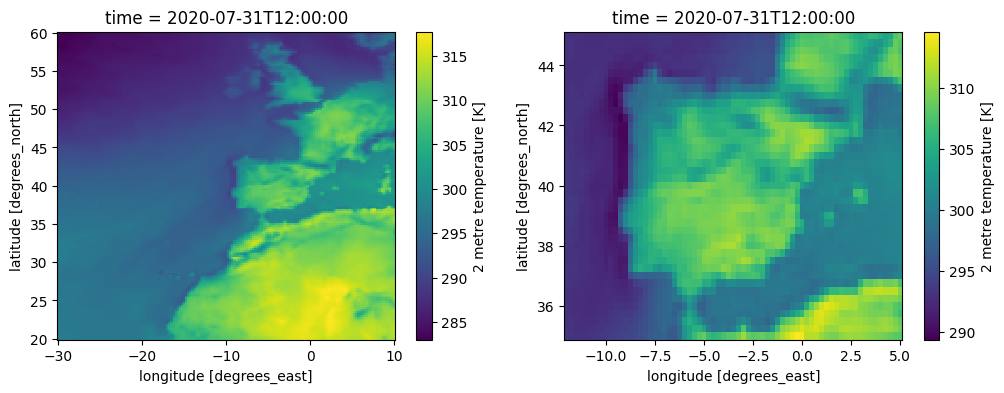

In [32]:
# Dibujamos el fichero original y el resultante de la selección de ventana geográfica
# ------------------------------------------------------------------------------------
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
t1 = xr.open_dataset('europa.nc').t2m.sel(time='20200731').plot(ax=ax1)
t2 = xr.open_dataset('peninsula.nc').t2m.sel(time='20200731').plot(ax=ax2)

In [34]:
# Remuestreo (no requiere interpolación)
# --------------------------------------------
!cdo samplegrid,4 peninsula.nc remuestreo_4.nc

cdo    samplegrid: Processed 195201 values from 3 variables over 23 timesteps [0.01s 188MB]


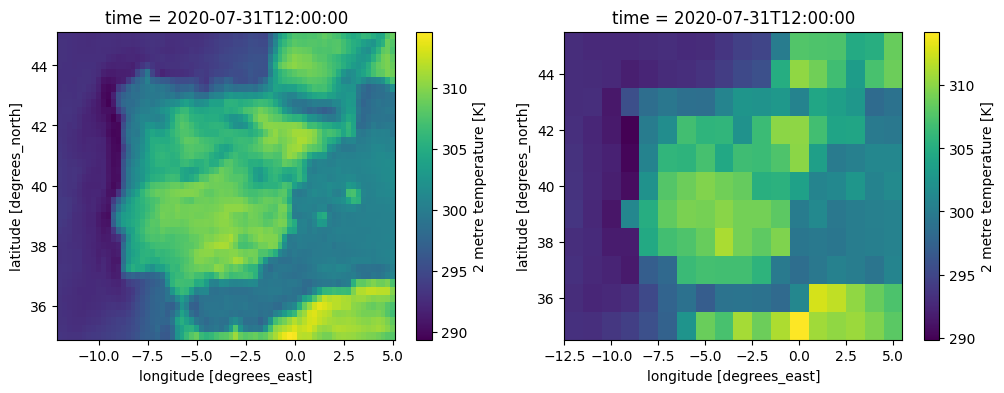

In [66]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
xr.open_dataset('peninsula.nc').t2m.sel(time='20200731').plot(ax=ax1)
xr.open_dataset('remuestreo_4.nc').t2m.sel(time='20200731').plot(ax=ax2)

In [33]:
# Limpieza
# ---------
!rm -f europa_*.nc peninsula_*.nc

##Operadores de [selección condicional](https://code.mpimet.mpg.de/projects/cdo/embedded/index.html#x1-2180002.4)

Permiten extraer datos de un campo en base a una máscara. Los valores de la máscara pueden ser 0 (falso) o superiores a cero (verdadero).

In [ ]:
# Esta máscara tiene valor 1 en tierra y valor 0 en el mar
# --------------------------------------------------------
!cdo showatts mascara_tierra_mar.nc

In [ ]:
# Extraemos la temperatura de un día cualquiera
# ----------------------------------------------
!cdo select,name=t2m,date=2020-07-24T12:00:00 era5_2000.nc t.nc

In [96]:
# Aplicamos la máscara para seleccionar solo los valores de temperatura en tierra
# --------------------------------------------------------------------------------
!cdo ifthen   mascara_tierra_mar.nc   t.nc   temperatura_tierra.nc

cdo    ifthen: Processed 51842 values from 2 variables over 2 timesteps [0.00s 348MB]


In [97]:
!cdo showvar temperatura_tierra.nc

 t2m
cdo    showname: Processed 1 variable [0.00s 348MB]


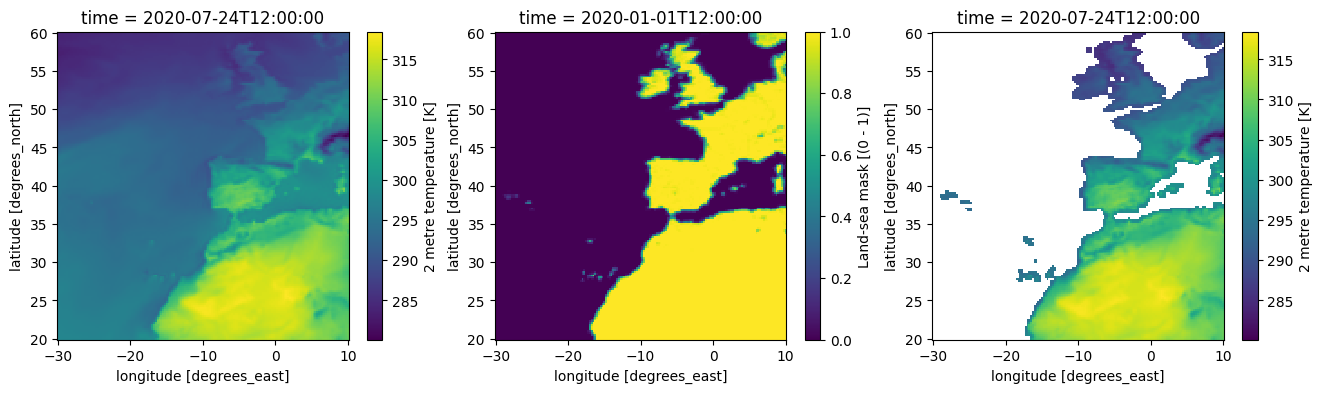

In [105]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,4))
xr.open_dataset('t.nc').t2m.isel(time=0).plot(ax=ax1)
xr.open_dataset('mascara_tierra_mar.nc').lsm.isel(time=0).plot(ax=ax2)
xr.open_dataset('temperatura_tierra.nc').t2m.isel(time=0).plot(ax=ax3)

In [102]:
# Para seleccionar la temperatura en el mar
# Ahora encadenamos los operadores
#------------------------------------------
!cdo -ifnotthen  mascara_tierra_mar.nc -select,name=t2m,date=2020-07-24T12:00:00 era5_2000.nc  temperatura_mar.nc

cdo(1) select: Process started
cdo    ifnotthen: Filling up stream1 >mascara_tierra_mar.nc< by copying the first timestep.
cdo(1) select: Processed 25921 values from 3 variables over 366 timesteps
cdo    ifnotthen: Processed 51842 values from 2 variables over 2 timesteps [0.02s 360MB]


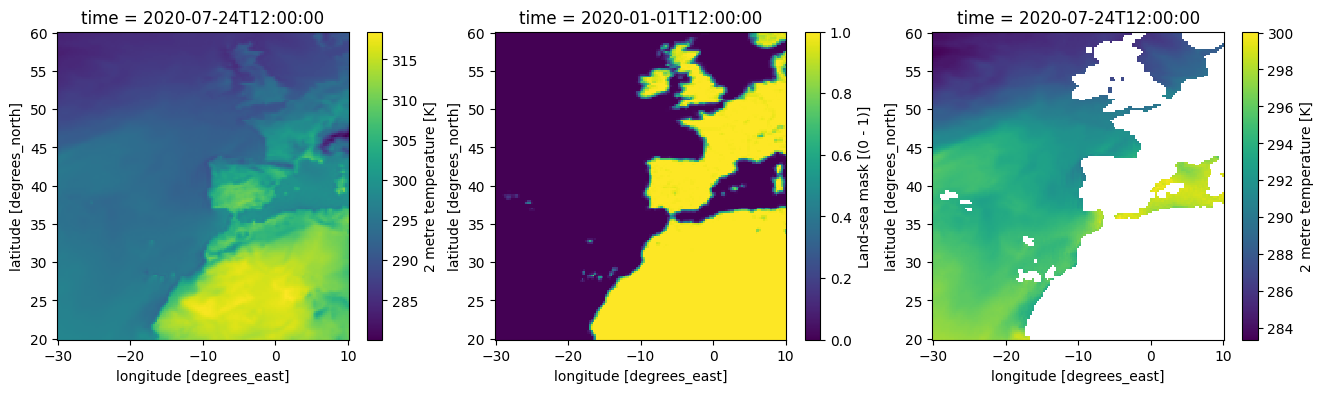

In [106]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,4))
xr.open_dataset('t.nc').t2m.isel(time=0).plot(ax=ax1)
xr.open_dataset('mascara_tierra_mar.nc').lsm.isel(time=0).plot(ax=ax2)
xr.open_dataset('temperatura_mar.nc').t2m.isel(time=0).plot(ax=ax3)

también es posible asignar un valor constante al área enmascarada

In [146]:
# Selección de la temperatura del mar en invierno y la de tierra en verano
#------------------------------------------------------------------------------
!cdo -select,name='t2m',date='2020-06-22T12:00:00' era5_2000.nc t_verano.nc
!cdo -select,name='t2m',date='2020-12-22T12:00:00' era5_2000.nc t_invierno.nc
!cdo -ifthenelse  mascara_tierra_mar.nc t_verano.nc t_invierno.nc hibrido.nc

cdo    select: Processed 25921 values from 3 variables over 366 timesteps [0.01s 465MB]
cdo    select: Processed 25921 values from 3 variables over 366 timesteps [0.01s 465MB]
cdo    ifthenelse: Processed 77763 values from 3 variables over 3 timesteps [0.00s 465MB]


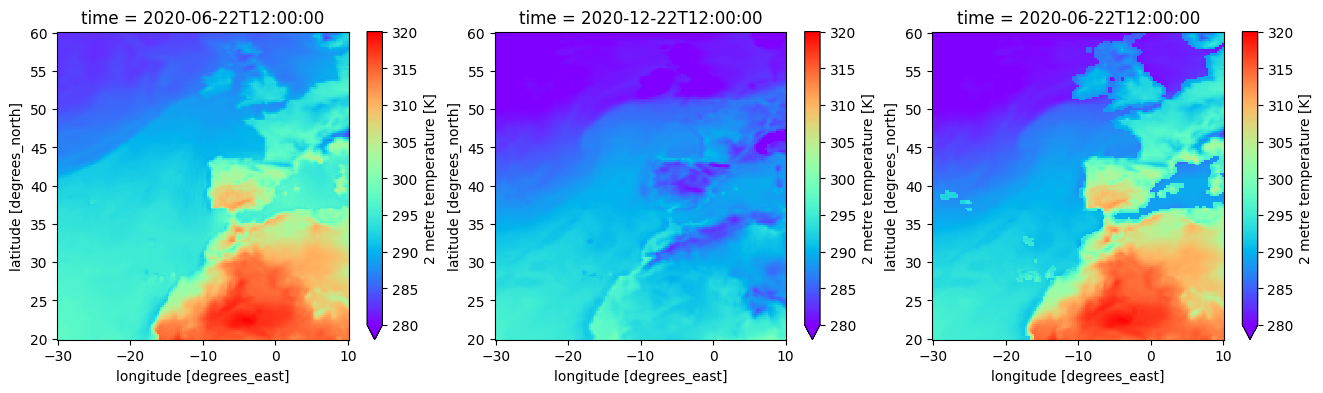

In [147]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,4))
xr.open_dataset('t_verano.nc').t2m.isel(time=0).plot(ax=ax1,cmap='rainbow',vmin=280,vmax=320)
xr.open_dataset('t_invierno.nc').t2m.isel(time=0).plot(ax=ax2,cmap='rainbow',vmin=280,vmax=320)
xr.open_dataset('hibrido.nc').t2m.isel(time=0).plot(ax=ax3,cmap='rainbow',vmin=280,vmax=320)

## Operadores de [comparación](https://code.mpimet.mpg.de/projects/cdo/embedded/index.html#x1-2390002.5)

Permiten la creación de máscaras. Asignan ceros y unos en función del valor de los campos seleccionados

In [166]:
# Selección de datos de temperatura del 1 de julio de 2020
# -----------------------------------------------------------
!cdo -select,name='t2m',date='2020-07-01T12:00:00'  era5_2000.nc julio.nc
# Selección de datos de temperatura del 1 de agosto de 2020
# -----------------------------------------------------------
!cdo -select,name='t2m',date='2020-08-01T12:00:00'  era5_2000.nc agosto.nc

# Creación de una máscara que toma valor 1 si la temperatura en julio supera la de agosto
# La opción -b F32 se asegura de que la comparación se realiza con la precisión necesaria
# ----------------------------------------------------------------------------------------
!cdo -b F32 -gt   julio.nc   agosto.nc   julio_mayor_que_agosto.nc

cdo    select: Processed 25921 values from 3 variables over 366 timesteps [0.01s 541MB]
cdo    select: Processed 25921 values from 3 variables over 366 timesteps [0.01s 541MB]
cdo    gt: Processed 51842 values from 2 variables over 2 timesteps [0.01s 541MB]


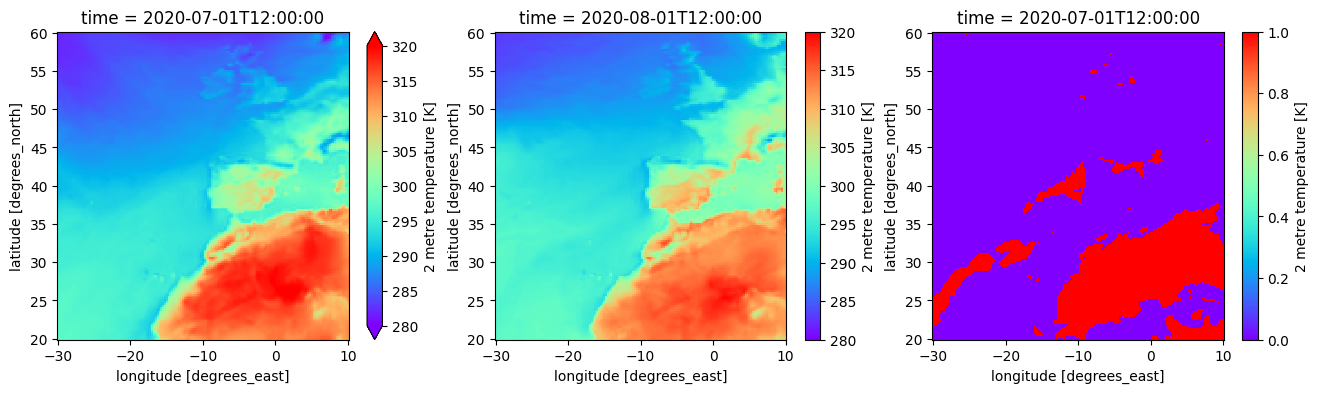

In [167]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,4))
xr.open_dataset('julio.nc').t2m.isel(time=0).plot(ax=ax1,cmap='rainbow',vmin=280,vmax=320)
xr.open_dataset('agosto.nc').t2m.isel(time=0).plot(ax=ax2,cmap='rainbow',vmin=280,vmax=320)
xr.open_dataset('julio_mayor_que_agosto.nc').t2m.isel(time=0).plot(ax=ax3,cmap='rainbow',vmin=0,vmax=1)